In [1]:
import pandas as pd

df = pd.read_csv("../../COALA_DS_DATA/COALA_DS_DATA/week5/data/house.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [2]:
house_data = df.drop(['id', 'date'], axis = 1)

In [3]:
from sklearn.model_selection import train_test_split

train_data = house_data.drop(['price'], axis = 1)
target_data = house_data['price']

# train : test set -> 8 : 2
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size = 0.2)

# 다시 train set을 8: 2로 나눠 val_data
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2)

print("모든 데이터", train_data.shape) # (행, 열)
print("Train set", x_train.shape, y_train.shape)
print("Valid set", x_valid.shape, y_valid.shape)
print("Test set", x_test.shape,  y_test.shape)

모든 데이터 (21613, 18)
Train set (13832, 18) (13832,)
Valid set (3458, 18) (3458,)
Test set (4323, 18) (4323,)


In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

print('train set score', lr.score(x_train, y_train))
print('valid set score', lr.score(x_valid, y_valid))

train set score 0.7012381216353812
valid set score 0.677585336867106


In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(2), 
                     LinearRegression())
model.fit(x_train, y_train)
print('train set score', model.score(x_train, y_train))
print('valid set score', model.score(x_valid, y_valid))

train set score 0.8263725910926853
valid set score 0.7864536604133295


In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model3 = make_pipeline(PolynomialFeatures(3), 
                     LinearRegression())
model3.fit(x_train, y_train)
print('train set score', model3.score(x_train, y_train))
print('valid set score', model3.score(x_valid, y_valid))

train set score 0.83228115570009
valid set score 0.20261645293995753


---------
## 특정 조건의 집 값 예측해보기

In [7]:
my_data = pd.Series({
    'bedrooms' : 2,
    'bathrooms' : 2.5,
    'sqft_living' :3000,
    'sqft_lot' : 5500,
    'floors' : 4,
    'waterfront' : 0,
    'view' : 0,
    'condition' : 3,
    'grade' : 9,
    'sqft_above' : 2350,
    'sqft_basement' : 500,
    'yr_built' : 2002,
    'yr_renovated' : 0,
    'zipcode' : 98000,
    'lat' : 47.5317,
    'long' : -122.391,
    'sqft_living15' : 2900,
    'sqft_lot15' : 3900
})

my_df = pd.DataFrame([my_data])

lr.predict(my_df)

array([870866.43545223])

## Decision Tree Regressor
* 최대 깊이 옵션에 따라 성능이 달라짐

In [8]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)

print('train set score', tree.score(x_train, y_train))
print('valid set score', tree.score(x_valid, y_valid))

train set score 0.9995030608476577
valid set score 0.6941669173627195


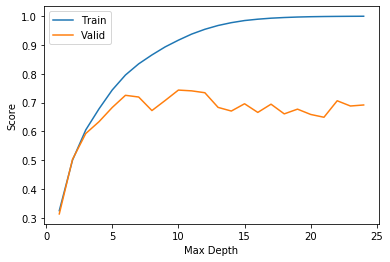

In [11]:
import matplotlib.pyplot as plt

train_score = []
valid_score = []
depth_range = range(1, 25)
for dept in depth_range:
    tree = DecisionTreeRegressor(max_depth = dept).fit(x_train, y_train)
    
    train_score.append(tree.score(x_train, y_train))
    valid_score.append(tree.score(x_valid, y_valid))
    
plt.plot(depth_range, train_score)
plt.plot(depth_range, valid_score)

plt.legend(['Train', 'Valid'])

plt.xlabel('Max Depth')
plt.ylabel('Score')

plt.show()